# KNN - K-Nearest- Neighbors

### Important note KNN and SVM are used for smaller datasets upto 1000 rows

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Target - Species 

In [3]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Step 2 - Basic Data Quality Checks

In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Step 3 - Seperate X and Y(species)

In [8]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [11]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

# Step 4 - Apply Preprocessing on X

In [12]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
).set_output(transform="pandas")

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


# Step 5 - Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.33, random_state=21
)

In [17]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.275726,0.092598,0.653295,0.401770
49,-1.018798,0.552499,-1.333255,-1.308624
65,1.034197,0.092598,0.369502,0.270202
117,2.241842,1.702254,1.674949,1.322752
55,-0.173447,-0.597255,0.426261,0.138633


In [18]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [19]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052682,-1.057157,0.142468,0.007064
44,-0.898033,1.702254,-1.049462,-1.045486
7,-1.018798,0.782450,-1.276496,-1.308624
21,-0.898033,1.472303,-1.276496,-1.045486
95,-0.173447,-0.137353,0.255985,0.007064


In [20]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [21]:
xtrain.shape

(99, 4)

In [22]:
xtest.shape

(50, 4)

# Step 6 - Build the model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=30)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=30)

In [24]:
model1.score(xtrain, ytrain)

0.8888888888888888

In [25]:
model1.score(xtest, ytest)

0.86

# Hyperparameter tuning

In [26]:
params = {"n_neighbors": [5, 6, 7, 8, 9, 10, 11]}

In [27]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
gscv_knn = GridSearchCV(knn, param_grid=params, scoring="f1_macro", cv=5)
gscv_knn.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_macro')

In [28]:
gscv_knn.best_params_

{'n_neighbors': 8}

In [29]:
gscv_knn.best_score_

np.float64(0.9397668997668998)

In [31]:
best_knn = gscv_knn.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=8)

In [32]:
best_knn.score(xtrain, ytrain)

0.9393939393939394

In [33]:
best_knn.score(xtest, ytest)

0.96

In [34]:
from sklearn.metrics import f1_score

ypred_test1 = best_knn.predict(xtest)
f1_score(ytest, ypred_test1, average="macro")

0.9576719576719577

# SVM - Support Vector Machines

In [35]:
from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(xtrain, ytrain)

SVC(probability=True)

In [36]:
model_svc.score(xtrain, ytrain)

0.98989898989899

In [37]:
model_svc.score(xtest, ytest)

0.94

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_svc, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([0.95213675, 1.        , 1.        , 0.84242424, 0.94405594])

In [39]:
scores.mean()

np.float64(0.9477233877233878)

# Based on cross validation score SVM is slightly better than KNN for this data

# Step 7 - Model evaluation

In [40]:
model_svc.score(xtrain, ytrain)

0.98989898989899

In [41]:
model_svc.score(xtest, ytest)

0.94

In [42]:
ypred_test2 = model_svc.predict(xtest)
f1_score(ytest, ypred_test2, average="macro")

0.9374389051808407

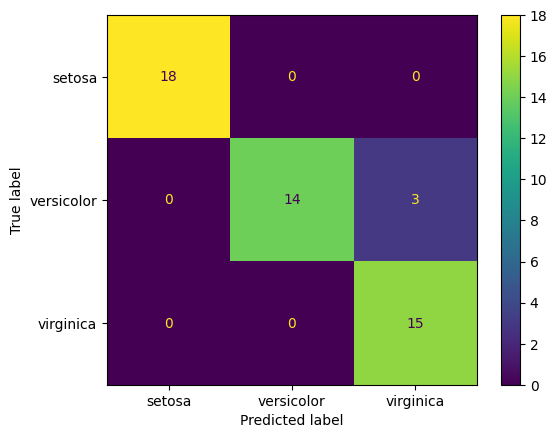

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_svc, xtest, ytest)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



# Step 8 - Apply Out of sample prediction

In [45]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [46]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [47]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,-0.137353,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.138633


In [53]:
preds = model_svc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [49]:
probs = model_svc.predict_proba(xnew_pre)
probs

array([[0.00966904, 0.93633131, 0.05399965],
       [0.01306955, 0.00638732, 0.98054313],
       [0.02641362, 0.9488278 , 0.02475858],
       [0.48566672, 0.37407804, 0.14025524],
       [0.01542606, 0.15211151, 0.83246244],
       [0.94442502, 0.03123732, 0.02433766],
       [0.03270996, 0.95653717, 0.01075288],
       [0.01185108, 0.01801098, 0.97013794],
       [0.95026434, 0.02599593, 0.02373973],
       [0.69862367, 0.21880193, 0.08257439],
       [0.0127651 , 0.97582586, 0.01140904],
       [0.01462308, 0.96600122, 0.0193757 ],
       [0.01553407, 0.007383  , 0.97708293],
       [0.01734063, 0.76049599, 0.22216338],
       [0.01977002, 0.14966746, 0.83056252]])

In [50]:
model_svc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [54]:
xnew["species_pred"] = preds

In [56]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,virginica
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,versicolor
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,setosa


In [57]:
xnew[model_svc.classes_] = probs.round(4)

In [58]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0097,0.9363,0.0540
1,6.9,3.1,5.1,2.3,virginica,0.0131,0.0064,0.9805
2,5.1,2.5,3.0,1.1,versicolor,0.0264,0.9488,0.0248
3,4.4,2.9,NaN,0.2,setosa,0.4857,0.3741,0.1403
4,5.9,3.0,5.1,1.8,virginica,0.0154,0.1521,0.8325
5,5.5,3.5,1.3,0.2,setosa,0.9444,0.0312,0.0243
6,5.6,NaN,3.6,1.3,versicolor,0.0327,0.9565,0.0108
7,6.5,3.0,5.2,2.0,virginica,0.0119,0.0180,0.9701
8,5.3,3.7,1.5,0.2,setosa,0.9503,0.0260,0.0237
9,5.1,3.4,1.5,NaN,setosa,0.6986,0.2188,0.0826


In [59]:
xnew.to_csv("svc_results.csv", index=False)

# Step 9 - Save the model object and preprocessor

In [60]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [61]:
model_svc

SVC(probability=True)

In [62]:
import joblib

joblib.dump(model_svc, "svc.joblib")

['svc.joblib']

In [63]:
joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

# Loading joblib files

In [64]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [65]:
m = joblib.load("svc.joblib")
m

SVC(probability=True)

In [66]:
m.score(xtrain, ytrain)

0.98989898989899

In [67]:
m.score(xtest, ytest)

0.94